# Neural Network Regression on GBP Exchange Rates

In [7]:
import requests
import pandas as pd
import numpy as np

# Download last 90 days GBP exchange rates from NBP
url = "http://api.nbp.pl/api/exchangerates/rates/A/GBP/last/90/?format=json"
response = requests.get(url)
data = response.json()

# Parse the JSON to DataFrame
rates = data['rates']
df = pd.DataFrame(rates)
df['effectiveDate'] = pd.to_datetime(df['effectiveDate'])
df = df[['effectiveDate', 'mid']]
df = df.rename(columns={'effectiveDate': 'Date', 'mid': 'Rate'})

print(df.head())

        Date    Rate
0 2024-12-17  5.1538
1 2024-12-18  5.1536
2 2024-12-19  5.1837
3 2024-12-20  5.1264
4 2024-12-23  5.1472


In [8]:
# Set window length
window_length = 7

X = []
y = []

# Sliding window feature creation
for i in range(len(df) - window_length):
    X.append(df['Rate'].iloc[i:i+window_length].values)
    y.append(df['Rate'].iloc[i+window_length])

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (83, 7)
y shape: (83,)


In [9]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
from sklearn.neural_network import MLPRegressor

# Neural network with one hidden layer of 44 neurons
model = MLPRegressor(hidden_layer_sizes=(44,), max_iter=5000, random_state=42)

# Train the model
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(44,), max_iter=5000, random_state=42)

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

Mean Squared Error: 0.16717043970269585
R2 Score: -245.24995845435575


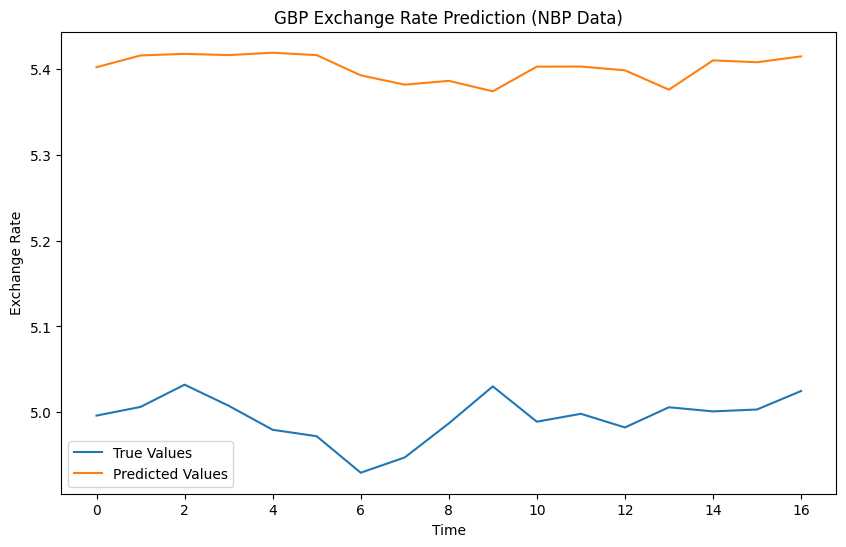

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('GBP Exchange Rate Prediction (NBP Data)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()